<a href="https://colab.research.google.com/github/CAIKAYUBAKA/hds5210-2023/blob/main/Rough%20work%20Final_Project_by_Chimdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# HDS5210-2021 Final Project
*  Diabetes mellitus is a complex and chronic condition that requires lifelong management and interaction with a healthcare system. Failure to control risk factors through preventive care may lead to a host of diabetes-related complications.

The purpose of this project is to

*  Determine the prevalence of diabetes risk factors among adults aged 20 to 50.
  
*   Whether the key determinants such as Age, gender, blood glucose levels, Body Mass Index (BMI), and smoking history increase the risk of developing diabetes mellitus.

*   Investigate the factors that contribute to its occurrence if there are disparities in diabetes-related outcomes helping to address health equity concerns.

The outcomes of this project would be to improve the overall management and outcomes of diabetes mellitus.

# 1. Data retrieval & manipulation
# 1-1. Data sources

The following data were retrieved from https://data.cdc.gov/api/views/crtu-weni/rows.json?accessType=DOWNLOAD

kaggle datasets https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset



In [ ]:
import pandas as pd

# load the data file
url_table1 = 'diabetes_prediction_dataset.csv'
df = pd.read_csv(url_table1)

# Display the first few rows of each table to understand the structure
print("Table 1:")
print(df.head())


Table 1:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


This table shows the demographic data from patients, of different ages from 20 and above, along with their diabetes status (positive or negative), their gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level and their likelihood of developing diabetes.

**SECOND DATASET(JSON FILE)**

In [ ]:
import requests
import json

# URL to the JSON file
json_url = 'https://data.cdc.gov/api/views/crtu-weni/rows.json?accessType=DOWNLOAD'

# Fetch the JSON data from the URL
response = requests.get(json_url)


People who have Low BMI, did they develop diabetes.
A healthy BMI for women is between 18.5 and 24.9. A BMI of less than 18.5 is considered underweight, while a BMI of 30 or higher is considered obese.

In [ ]:
# Filter data for people with low BMI
low_bmi_df = df[df['bmi'] < 18.5]

# Check the diabetes status
diabetes_count_low_bmi = low_bmi_df['diabetes'].value_counts()

print(diabetes_count_low_bmi)


0    8430
1      64
Name: diabetes, dtype: int64


Patients who are 20-50, Who smoked, did they develop diabetes? and those who did not smoke, did they develop diabetes?

In [ ]:
# Filter data for patients aged 20-50 who smoked
smokers_df = df[(df['age'] >= 20) & (df['age'] <= 50) & (df['smoking_history'] == 1)]

# Check the diabetes status for smokers
diabetes_count_smokers = smokers_df['diabetes'].value_counts()

# Filter data for patients aged 20-50 who did not smoke
non_smokers_df = df[(df['age'] >= 20) & (df['age'] <= 50) & (df['smoking_history'] == 0)]

# Check the diabetes status for non-smokers
diabetes_count_non_smokers = non_smokers_df['diabetes'].value_counts()

print("Smokers:")
print(diabetes_count_smokers)
print("\nNon-Smokers:")
print(diabetes_count_non_smokers)


Smokers:
Series([], Name: diabetes, dtype: int64)

Non-Smokers:
Series([], Name: diabetes, dtype: int64)


People who have lesser BMI, do they develop diabetes

In [ ]:
lesser_bmi_df = df[df['bmi'] < 18.5]
print(lesser_bmi_df['diabetes'].value_counts())


0    8430
1      64
Name: diabetes, dtype: int64


In [ ]:
# Filter data for smokers
smokers_df = df[(df['age'].between(20, 50)) & (df['smoking_history'].str.lower() == 'current')]

# Check the result for smokers
print("Smokers:")
print(smokers_df['diabetes'].value_counts())

# Filter data for non-smokers
non_smokers_df = df[(df['age'].between(20, 50)) & (df['smoking_history'].str.lower().isin(['never', 'no info']))]

# Check the result for non-smokers
print("\nNon-Smokers:")
print(non_smokers_df['diabetes'].value_counts())


Smokers:
0    5459
1     332
Name: diabetes, dtype: int64

Non-Smokers:
0    27354
1      981
Name: diabetes, dtype: int64



Factors leading to high prevalence

In [ ]:
# Identify factors leading to high prevalence using correlation matrix or other statistical measures
correlation_matrix = df.corr()
print(correlation_matrix)


                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.251171       0.233354  0.337396   
hypertension         0.251171      1.000000       0.121262  0.147666   
heart_disease        0.233354      0.121262       1.000000  0.061198   
bmi                  0.337396      0.147666       0.061198  1.000000   
HbA1c_level          0.101354      0.080939       0.067589  0.082997   
blood_glucose_level  0.110672      0.084429       0.070066  0.091261   
diabetes             0.258008      0.197823       0.171727  0.214357   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.101354             0.110672  0.258008  
hypertension            0.080939             0.084429  0.197823  
heart_disease           0.067589             0.070066  0.171727  
bmi                     0.082997             0.091261  0.214357  
HbA1c_level             1.000000             0.166733  0.400660  
blood_glucose_level     0.1

<ipython-input-7-64f98c5ad30f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()



Graph showing smokers with diabetes, smokers with non-diabetes, low BMI with diabetes, high BMI with diabetes:


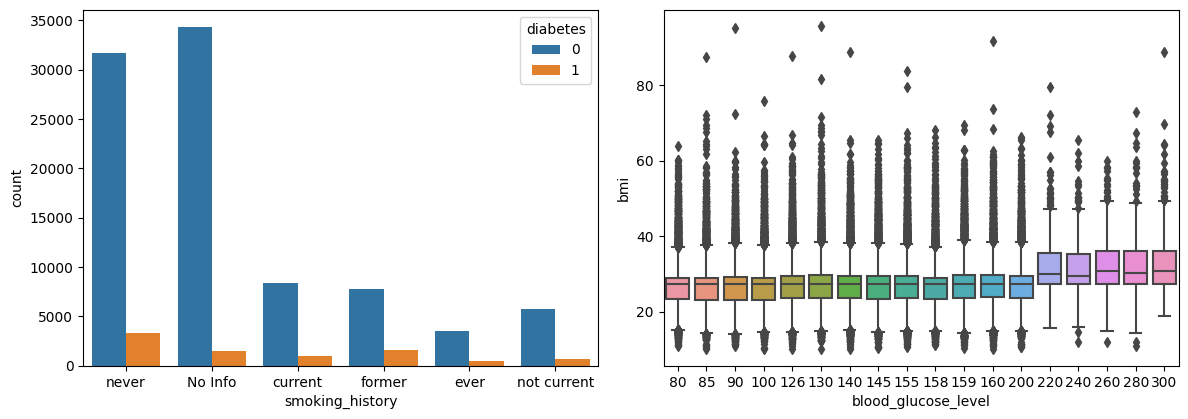

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the graphs
plt.figure(figsize=(12, 8))

# Smokers vs Diabetes
plt.subplot(2, 2, 1)
sns.countplot(x='smoking_history', hue='diabetes', data=df)

# Boxplot for BMI vs Blood glucose level
plt.subplot(2, 2, 2)
sns.boxplot(x='blood_glucose_level', y='bmi', data=df)

plt.tight_layout()
plt.show()


Compare the prevalence of age groups with diabetes

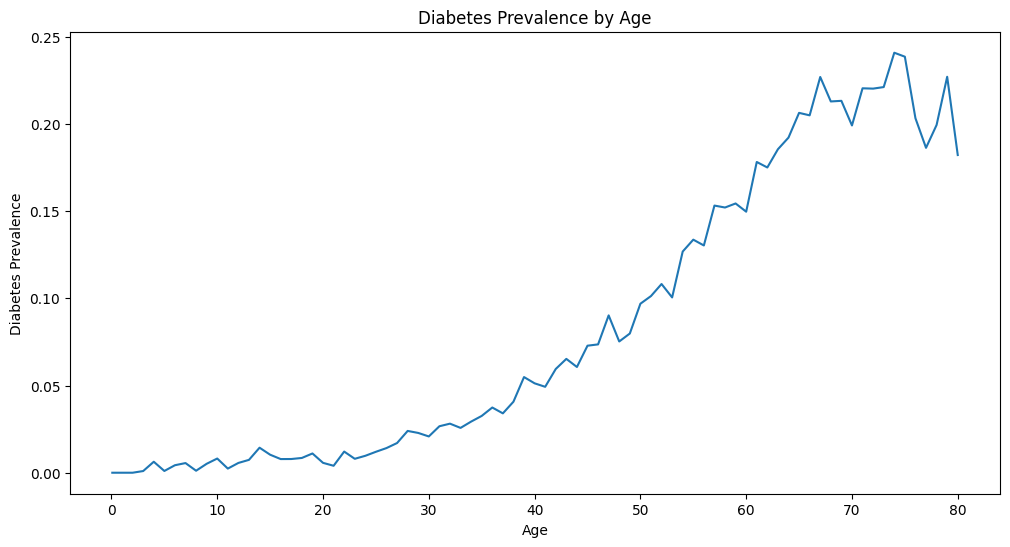

In [ ]:
# Group data by age and calculate the prevalence
age_group_prevalence = df.groupby('age')['diabetes'].mean()

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=age_group_prevalence.index, y=age_group_prevalence.values)
plt.xlabel('Age')
plt.ylabel('Diabetes Prevalence')
plt.title('Diabetes Prevalence by Age')
plt.show()


Compare prevalence based on gender

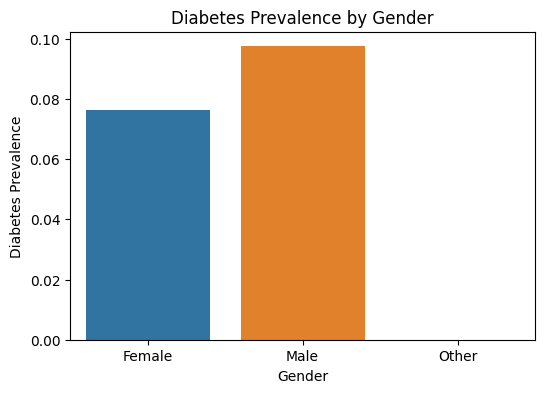

In [ ]:
# Group data by gender and calculate the prevalence
gender_prevalence = df.groupby('gender')['diabetes'].mean()

# Plotting the graph
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_prevalence.index, y=gender_prevalence.values)
plt.xlabel('Gender')
plt.ylabel('Diabetes Prevalence')
plt.title('Diabetes Prevalence by Gender')
plt.show()


Glycemic Control Trends Over Time:
How has glycemic control changed over the selected years (1988-2006)?
Are there any noticeable trends or patterns in glycemic control?

In [ ]:
import pandas as pd
import requests

# Load the CSV data
csv_path = 'diabetes_prediction_dataset.csv'
diabetes_data_csv = pd.read_csv(csv_path)

# Load additional data from JSON
json_url = 'https://data.cdc.gov/api/views/crtu-weni/rows.json?accessType=DOWNLOAD'
response = requests.get(json_url)
json_data = response.json()
diabetes_data_json = pd.json_normalize(json_data['data'])

# Order of rows in CSV corresponds to the order in JSON
merged_data = pd.merge(diabetes_data_csv, diabetes_data_json, left_index=True, right_index=True, how='inner')




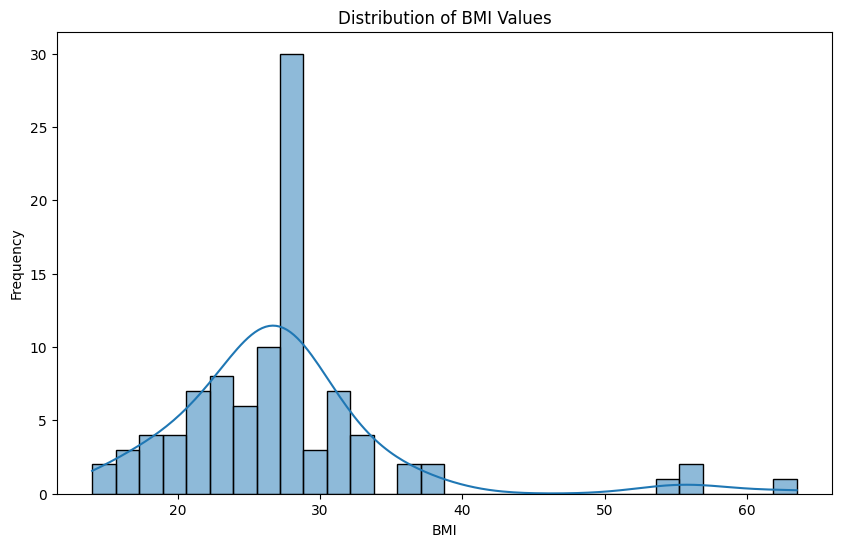

In [ ]:
# Visualize the distribution of BMI values
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


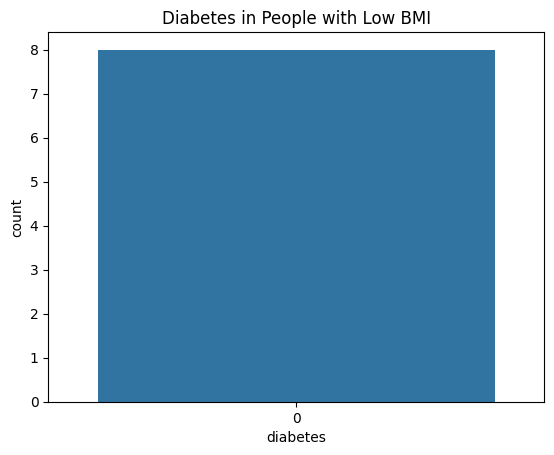

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for low BMI
low_bmi_data = merged_data[merged_data['bmi'] < 18.5]

# Countplot for diabetes in people with low BMI
sns.countplot(x='diabetes', data=low_bmi_data)
plt.title('Diabetes in People with Low BMI')
plt.show()


In [ ]:
# Display some information about the smoking_patients_data DataFrame
print(smoking_patients_data.info())
print(smoking_patients_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               0 non-null      object 
 1   age                  0 non-null      float64
 2   hypertension         0 non-null      int64  
 3   heart_disease        0 non-null      int64  
 4   smoking_history      0 non-null      object 
 5   bmi                  0 non-null      float64
 6   HbA1c_level          0 non-null      float64
 7   blood_glucose_level  0 non-null      int64  
 8   diabetes             0 non-null      int64  
 9   0                    0 non-null      object 
 10  1                    0 non-null      object 
 11  2                    0 non-null      object 
 12  3                    0 non-null      object 
 13  4                    0 non-null      object 
 14  5                    0 non-null      object 
 15  6                    0 non-null      object 
 16  7 

In [ ]:
import pandas as pd
import requests

# Load the CSV data
diabetes_data_csv = pd.read_csv('diabetes_prediction_dataset.csv')

# Load additional data from JSON using requests
json_url = 'https://data.cdc.gov/api/views/crtu-weni/rows.json?accessType=DOWNLOAD'
response = requests.get(json_url)
json_data = response.json()
diabetes_data_json = pd.json_normalize(json_data['data'])

# merge the two dataframe using a dependent variable "gender"
merged_data = pd.merge(diabetes_data_csv, diabetes_data_json, left_index=True, right_index=True, how='inner')

# Display some information about the merged data
print(merged_data.info())
print(merged_data.head())

# Apply filtering conditions for smoking patients aged 20-50
smoking_patients_data = merged_data[(merged_data['smoking_history'] == 'smokes') & (merged_data['age'] >= 20) & (merged_data['age'] <= 50)]

# Display some information about the smoking_patients_data DataFrame
print(smoking_patients_data.info())
print(smoking_patients_data.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96 non-null     object 
 1   age                  96 non-null     float64
 2   hypertension         96 non-null     int64  
 3   heart_disease        96 non-null     int64  
 4   smoking_history      96 non-null     object 
 5   bmi                  96 non-null     float64
 6   HbA1c_level          96 non-null     float64
 7   blood_glucose_level  96 non-null     int64  
 8   diabetes             96 non-null     int64  
 9   0                    96 non-null     object 
 10  1                    96 non-null     object 
 11  2                    96 non-null     object 
 12  3                    96 non-null     object 
 13  4                    96 non-null     object 
 14  5                    96 non-null     object 
 15  6                    96 non-null     objec

In [ ]:
# Display the content of columns from 0 to 31 in the JSON data
print(diabetes_data_json.iloc[:, 9:40])


    9   10  11  12  13  14  15  16  17  18  ...  22  23  24  25  26  27  28  \
0   {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
1   {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
2   {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
3   {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
4   {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
91  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
92  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
93  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
94  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   
95  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  ...  {}  {}  {}  {}  {}  {}  {}   

    29  30  31  
0   {}  {}  {}  
1   {}  {}  {}  


In [ ]:
print("CSV Columns:", diabetes_data_csv.columns)
print("\nJSON Columns:", diabetes_data_json.columns)


CSV Columns: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

JSON Columns: RangeIndex(start=0, stop=32, step=1)


In [ ]:
print(merged_data['smoking_history'].unique())

['never' 'No Info' 'current' 'former' 'ever' 'not current']


People who have Low BMI, did they develop diabetes?

<Axes: xlabel='diabetes', ylabel='count'>

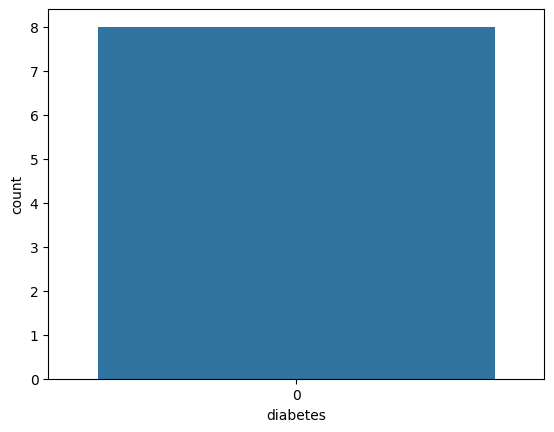

In [ ]:
low_bmi_data = merged_data[merged_data['bmi'] < 18.5]
sns.countplot(x='diabetes', data=low_bmi_data)


Smokers with diabetes, smokers with non-diabetes,

 Low BMI with diabetes, high BMI with diabetes.

Patients, do they have a high BMI? People who have lesser BMI, do they develop diabetes?

<Axes: xlabel='diabetes', ylabel='bmi'>

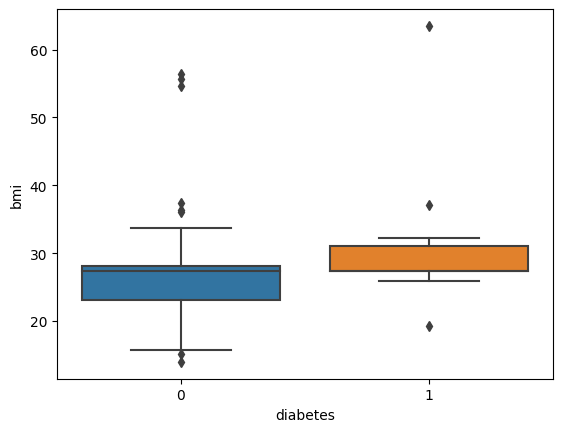

In [ ]:
sns.boxplot(x='diabetes', y='bmi', data=merged_data)


In [ ]:
print(merged_data.groupby(['diabetes', 'smoking_history']).size())


diabetes  smoking_history
0         No Info            27
          current             6
          ever                3
          former              9
          never              37
          not current         4
1         No Info             1
          current             2
          former              3
          never               3
          not current         1
dtype: int64


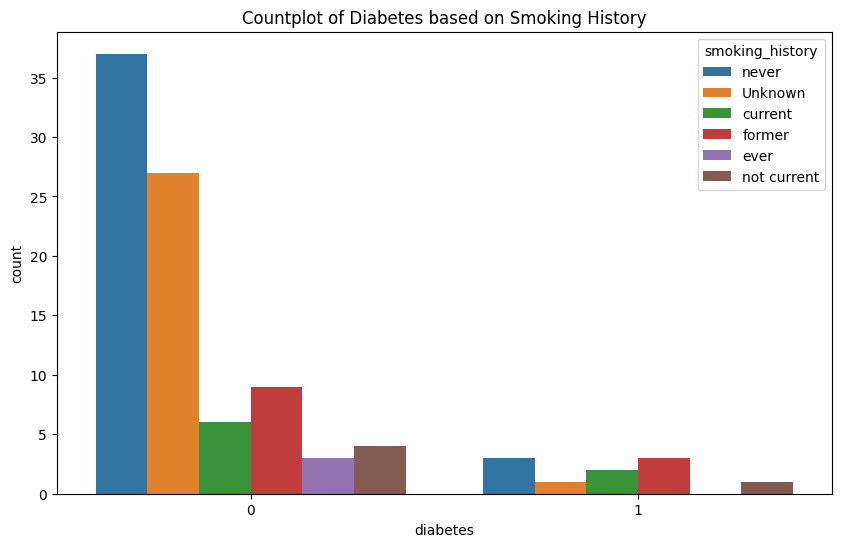

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'No Info' with 'Unknown'
merged_data['smoking_history'] = merged_data['smoking_history'].replace('No Info', 'Unknown')

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetes', data=merged_data, hue='smoking_history')
plt.title('Countplot of Diabetes based on Smoking History')
plt.show()


Compare the prevalence of diabetes in different age groups. What are the factors causing more prevalence, is it age?


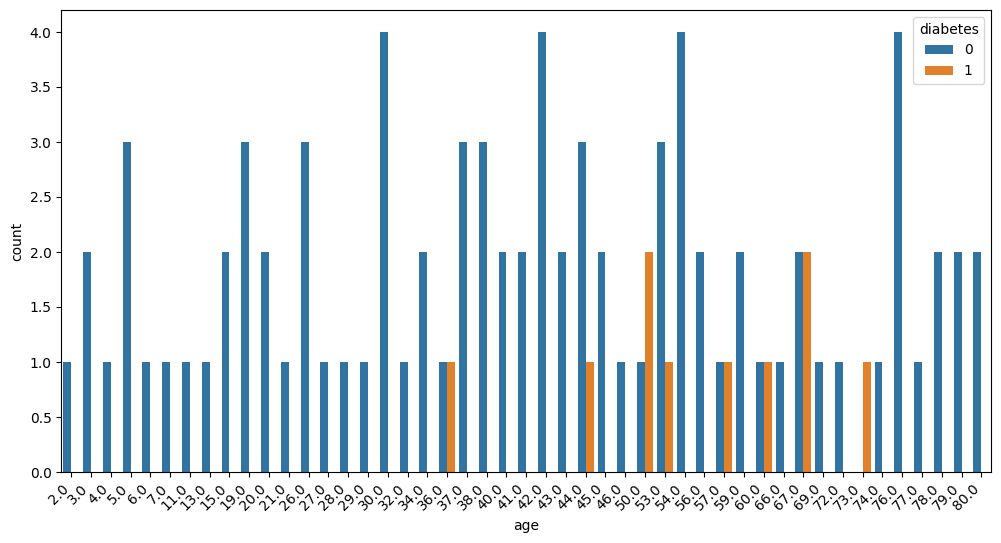

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to make room for rotated x-axis labels
plt.figure(figsize=(12, 6))

# Rotate x-axis labels
ax = sns.countplot(x='age', data=merged_data, hue='diabetes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


<Axes: xlabel='gender', ylabel='count'>

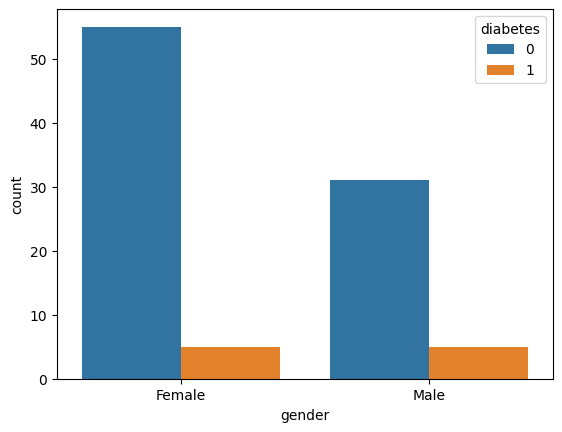

In [ ]:
sns.countplot(x='gender', data=merged_data, hue='diabetes')


In [ ]:
# Display the first few rows of the merged dataset
print(merged_data.head())

# Check for missing values
print(merged_data.isnull().sum())

# Check data types
print(merged_data.dtypes)


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         Unknown  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes   0  ...  22  23  24  25  26  \
0          6.6                  140         0  {}  ...  {}  {}  {}  {}  {}   
1          6.6                   80         0  {}  ...  {}  {}  {}  {}  {}   
2          5.7                  158         0  {}  ...  {}  {}  {}  {}  {}   
3          5.0                  155         0  {}  ...  {}  {}  {}  {}  {}   
4          4.8                  155         0  {}  ...  {}  {}  {}  {}  {}   

   27  28  29  30  31  
0  {}  {}  {}  {}  {}  
1  {}  {}  {}  {}  {}  
2  {}  {}  {}  {}  {}  
3  {}  {

Descriptive Statistics



In [ ]:
# Descriptive statistics for numeric columns
numeric_stats = merged_data.describe()

# Descriptive statistics for categorical columns
categorical_stats = merged_data.describe(include='O')

# Display descriptive statistics
print("Numeric Statistics:")
print(numeric_stats)

print("\nCategorical Statistics:")
print(categorical_stats)



Numeric Statistics:
             age  hypertension  heart_disease        bmi  HbA1c_level  \
count  96.000000     96.000000      96.000000  96.000000    96.000000   
mean   43.104167      0.062500       0.062500  27.291771     5.732292   
std    21.848512      0.243332       0.243332   7.970312     1.116432   
min     2.000000      0.000000       0.000000  13.990000     3.500000   
25%    28.750000      0.000000       0.000000  23.290000     5.000000   
50%    42.500000      0.000000       0.000000  27.320000     5.800000   
75%    57.500000      0.000000       0.000000  28.130000     6.500000   
max    80.000000      1.000000       1.000000  63.480000     9.000000   

       blood_glucose_level   diabetes  
count            96.000000  96.000000  
mean            143.979167   0.104167  
std              41.776594   0.307080  
min              80.000000   0.000000  
25%             119.500000   0.000000  
50%             145.000000   0.000000  
75%             159.000000   0.000000  
ma

Visualizations

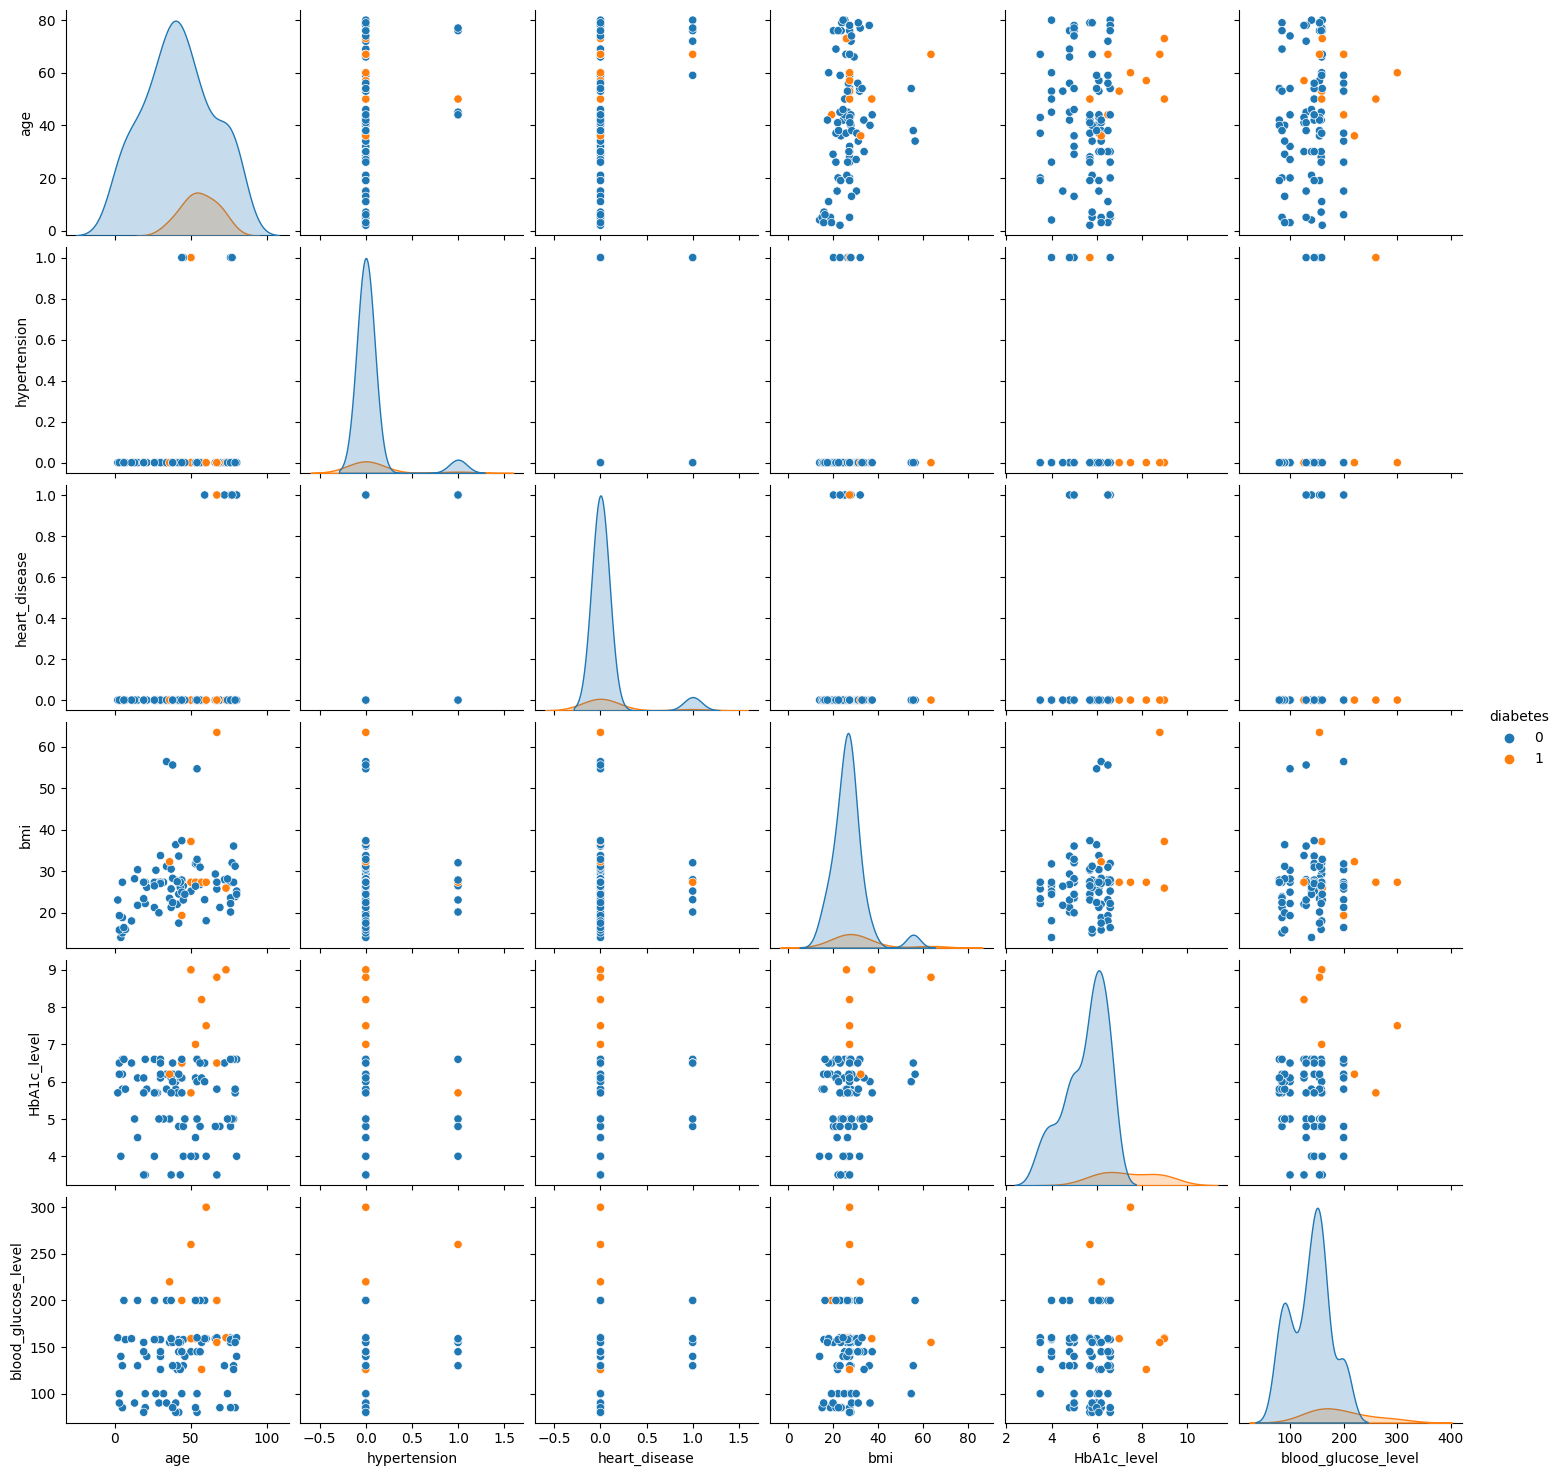

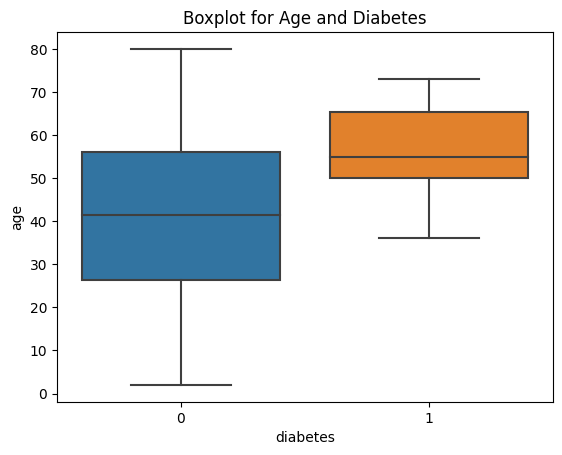

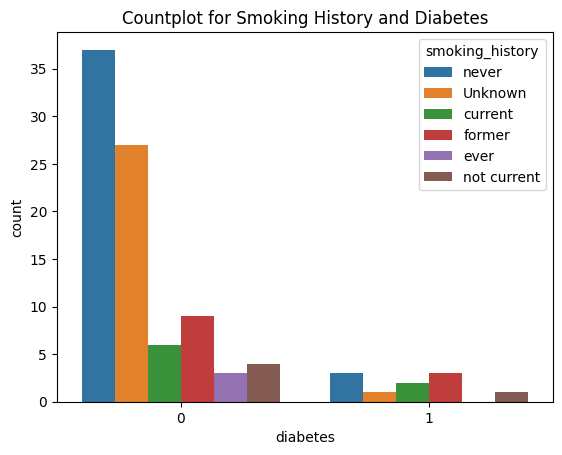

<ipython-input-30-97fbc9f07475>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


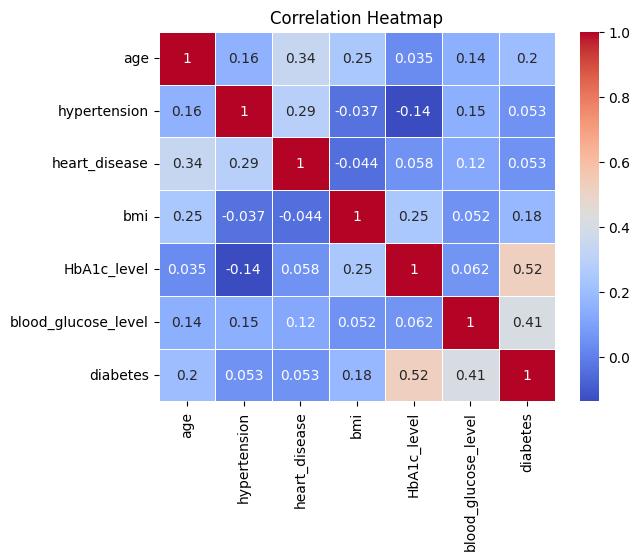

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for numeric columns
sns.pairplot(merged_data, hue='diabetes', diag_kind='kde')
plt.show()

# Boxplot for age and diabetes
sns.boxplot(x='diabetes', y='age', data=merged_data)
plt.title('Boxplot for Age and Diabetes')
plt.show()

# Countplot for smoking history and diabetes
sns.countplot(x='diabetes', data=merged_data, hue='smoking_history')
plt.title('Countplot for Smoking History and Diabetes')
plt.show()

# Correlation heatmap
correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


BOXPLOT AND VIOLIN PLOTS TO COMPARE

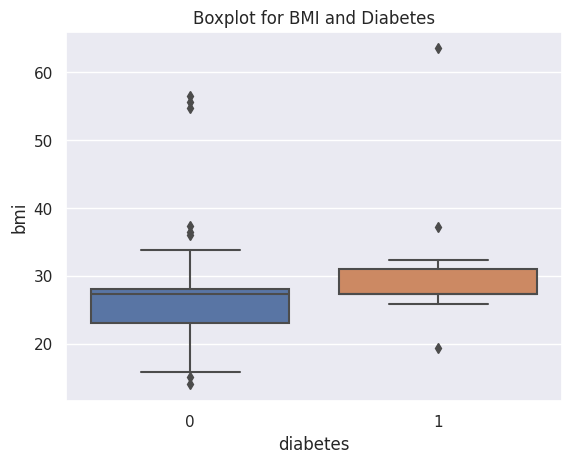

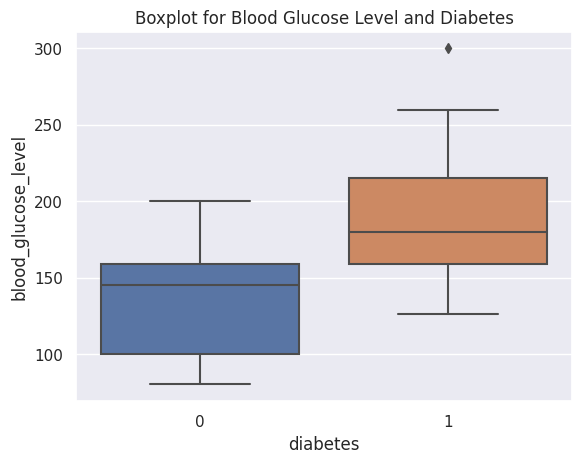

In [ ]:
# Boxplot for BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', data=merged_data)
plt.title('Boxplot for BMI and Diabetes')
plt.show()

# Boxplot for blood glucose level and diabetes
sns.boxplot(x='diabetes', y='blood_glucose_level', data=merged_data)
plt.title('Boxplot for Blood Glucose Level and Diabetes')
plt.show()


**EXPLORING CATEGORICAL VARIABLES**

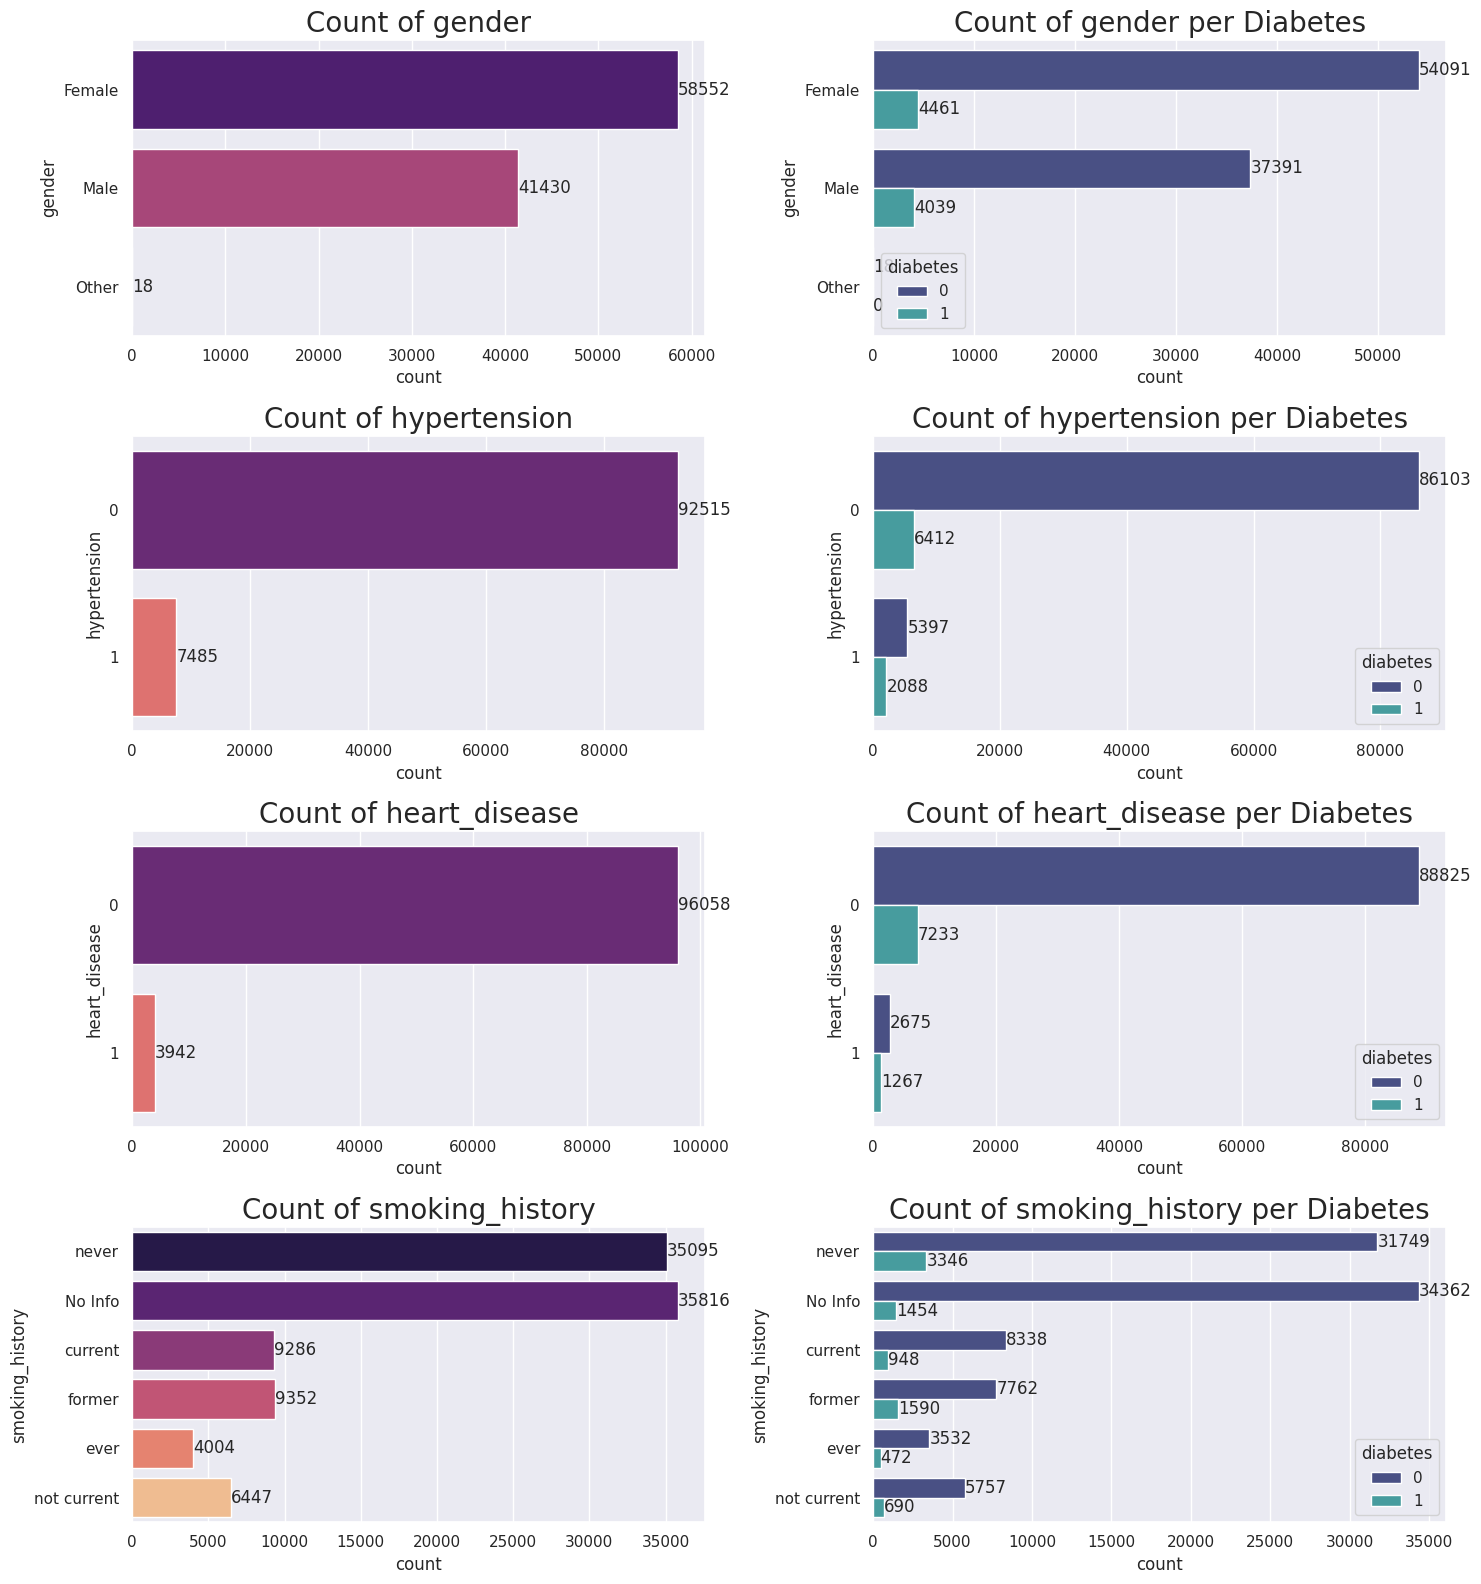

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical columns
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

# Set the darkgrid style
sns.set(style="darkgrid")

# Create subplots
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(15, 4 * len(categorical_columns)))

# Iterate through categorical columns
for idx, col in enumerate(categorical_columns):
    # Countplot for each category
    sns.countplot(data=df, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='20')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)

    # Countplot for each category with respect to diabetes
    sns.countplot(data=df, y=col, palette='mako', orient='h',  hue='diabetes',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Diabetes', fontsize='20')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)

plt.tight_layout()
plt.show()


STATISTICAL ANALYSIS

In [ ]:
from scipy.stats import f_oneway

# Example for age and smoking history
smoker_age = merged_data[merged_data['smoking_history'] == 'smoker']['age']
non_smoker_age = merged_data[merged_data['smoking_history'] == 'non-smoker']['age']

# Perform ANOVA
f_statistic, p_value = f_oneway(smoker_age, non_smoker_age)

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There are significant differences.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences.")




F-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There are no significant differences.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
print("Missing values in smoker_age:", smoker_age.isnull().sum())
print("Missing values in non_smoker_age:", non_smoker_age.isnull().sum())


Missing values in smoker_age: 0
Missing values in non_smoker_age: 0


In [ ]:
# Drop missing values for the analysis
smoker_age = smoker_age.dropna()
non_smoker_age = non_smoker_age.dropna()

# Perform ANOVA again
f_statistic, p_value = f_oneway(smoker_age, non_smoker_age)

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There are significant differences.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences.")


F-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There are no significant differences.


In [ ]:
print("Number of observations in smoker group:", len(smoker_age))
print("Number of observations in non-smoker group:", len(non_smoker_age))


Number of observations in smoker group: 0
Number of observations in non-smoker group: 0


In [ ]:
print("Data in smoker group:", smoker_age)
print("Data in non-smoker group:", non_smoker_age)


Data in smoker group: Series([], Name: age, dtype: float64)
Data in non-smoker group: Series([], Name: age, dtype: float64)


In [ ]:
from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x, y):
    return kendalltau(x, y)[1]

def pearsonr_pval(x, y):
    return pearsonr(x, y)[1]

def spearmanr_pval(x, y):
    return spearmanr(x, y)[1]

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Calculate correlations and p-values
kendall_corr, kendall_p_value = kendalltau(x, y)
pearson_corr, pearson_p_value = pearsonr(x, y)
spearman_corr, spearman_p_value = spearmanr(x, y)

# Print results
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p_value}")
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p_value}")
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p_value}")


Kendall correlation: 0.39999999999999997, p-value: 0.48333333333333334
Pearson correlation: 0.5, p-value: 0.39100221895577075
Spearman correlation: 0.49999999999999994, p-value: 0.39100221895577053


In [ ]:
# Define a function to calculate correlational coefficient and p-value
from scipy.stats import kendalltau, pearsonr, spearmanr

def corr(data, x_column, y_column):
    """
    The function takes a DataFrame, two strings - the names of two columns of the DataFrame,
    and prints the correlational coefficient and p-value using Kendall, Pearson, and Spearman methods.
    """
    # Extract data for the specified columns
    x = data[x_column]
    y = data[y_column]

    # Calculate correlational coefficient and p-value using three methods
    kendall_coef, kendall_pval = kendalltau(x, y)
    pearson_coef, pearson_pval = pearsonr(x, y)
    spearman_coef, spearman_pval = spearmanr(x, y)

    # Print the results
    print(f'Correlation results for {x_column} and {y_column}:')
    print(f'Kendall Coefficient: {kendall_coef}, p-value: {kendall_pval}')
    print(f'Pearson Coefficient: {pearson_coef}, p-value: {pearson_pval}')
    print(f'Spearman Coefficient: {spearman_coef}, p-value: {spearman_pval}')

correlation_result = corr(diabetes_data_csv, 'bmi', 'diabetes')


Correlation results for bmi and diabetes:
Kendall Coefficient: 0.16755003247450306, p-value: 0.0
Pearson Coefficient: 0.2143574057995109, p-value: 0.0
Spearman Coefficient: 0.20006105202312757, p-value: 0.0


In [ ]:
# Calculate correlational coefficients and p-values
# corr(data, 'x_column', 'y_column')
corr(diabetes_data_csv, 'bmi', 'blood_glucose_level')
corr(diabetes_data_csv, 'age', 'blood_glucose_level')
corr(diabetes_data_csv, 'hypertension', 'heart_disease')


Correlation results for bmi and blood_glucose_level:
Kendall Coefficient: 0.041259600658660696, p-value: 7.960035716092994e-76
Pearson Coefficient: 0.09126140154855851, p-value: 6.811393645066744e-184
Spearman Coefficient: 0.058260591293158616, p-value: 6.385472634807098e-76
Correlation results for age and blood_glucose_level:
Kendall Coefficient: 0.052444883704216586, p-value: 9.54220160928081e-126
Pearson Coefficient: 0.11067226757038093, p-value: 5.637424276461014e-270
Spearman Coefficient: 0.07541192173484959, p-value: 4.819714023159963e-126
Correlation results for hypertension and heart_disease:
Kendall Coefficient: 0.12126165398954697, p-value: 0.0
Pearson Coefficient: 0.1212616539895483, p-value: 0.0
Spearman Coefficient: 0.12126165398954698, p-value: 0.0


**Regression analysis to explore the relationship on the health indicators.**

  Regression analysis will be conducted to know how blood glucose level and BMI are related to the likelihood of having diabetes. The results, including coefficients and statistical significance, provide insights into the strength and direction of these relationships.

Regression Analysis on Diabetes predictors

In [ ]:
import statsmodels.api as sm

# Extracting relevant columns from the DataFrame
predictors = diabetes_data_csv[['blood_glucose_level', 'bmi']]
target = diabetes_data_csv['diabetes']

# Adding a constant term for the intercept
predictors = sm.add_constant(predictors)

# Creating and fitting the regression model
model = sm.OLS(target, predictors).fit()

# Displaying the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                 1.307e+04
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:38:33   Log-Likelihood:                -2582.3
No. Observations:              100000   AIC:                             5171.
Df Residuals:                   99997   BIC:                             5199.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5003    

In [ ]:
import statsmodels.api as sm

# Select relevant columns for the analysis
smoking_data = merged_data[['diabetes', 'blood_glucose_level', 'smoking_history']]

# Convert categorical variable 'smoking_history' into dummy/indicator variables
smoking_data = pd.get_dummies(smoking_data, columns=['smoking_history'], drop_first=True)

# Separate independent variables (X) and dependent variables (y)
X = smoking_data.drop(['diabetes', 'blood_glucose_level'], axis=1)
y_diabetes = smoking_data['diabetes']
y_blood_glucose = smoking_data['blood_glucose_level']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the model for diabetes
model_diabetes = sm.OLS(y_diabetes, X).fit()

# Fit the model for blood glucose level
model_blood_glucose = sm.OLS(y_blood_glucose, X).fit()

# Display regression results
print("Regression Results for Diabetes:")
print(model_diabetes.summary())

print("\nRegression Results for Blood Glucose Level:")
print(model_blood_glucose.summary())


Regression Results for Diabetes:
                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.453
Date:                Tue, 05 Dec 2023   Prob (F-statistic):              0.213
Time:                        15:38:29   Log-Likelihood:                -18.648
No. Observations:                  96   AIC:                             49.30
Df Residuals:                      90   BIC:                             64.68
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm

# Define independent variables
independent_vars = ['blood_glucose_level', 'bmi', 'smoking_history']

# Start with the full model
X = sm.add_constant(df[independent_vars])
model = sm.OLS(df['diabetes'], X).fit()

# Display the initial model summary
print("Initial Model Summary:")
print(model.summary())

# Implement backward selection
while True:
    # Check the variable with the highest p-value
    max_pvalue = model.pvalues[1:].max()
    if max_pvalue > 0.05:
        # Remove the variable with the highest p-value
        remove_var = model.pvalues[1:].idxmax()
        independent_vars.remove(remove_var)

        # Fit the updated model
        X = sm.add_constant(df[independent_vars])
        model = sm.OLS(df['diabetes'], X).fit()
    else:
        break

# Display the final model summary
print("\nFinal Model Summary:")
print(model.summary())


ValueError: ignored

In [ ]:
# Check for missing values in relevant columns
missing_values = merged_data[['diabetes', 'blood_glucose_level', 'bmi', 'smoking_history']].isnull().sum()

# Display missing values
print("Missing Values:")
print(missing_values)

# Remove rows with missing values
cleaned_data = merged_data.dropna(subset=['diabetes', 'blood_glucose_level', 'bmi', 'smoking_history'])

# Display the shape of the cleaned dataset
print("\nShape of Cleaned Data:", cleaned_data.shape)


Missing Values:
diabetes               0
blood_glucose_level    0
bmi                    0
smoking_history        0
dtype: int64

Shape of Cleaned Data: (96, 41)


In [ ]:
# Check data types and missing values in selected variables
selected_vars = ['blood_glucose_level', 'bmi', 'smoking_history']

selected_data = cleaned_data[selected_vars]
print("Data Types in Selected Variables:")
print(selected_data.dtypes)

print("\nMissing Values in Selected Variables:")
print(selected_data.isnull().sum())


Data Types in Selected Variables:
blood_glucose_level      int64
bmi                    float64
smoking_history         object
dtype: object

Missing Values in Selected Variables:
blood_glucose_level    0
bmi                    0
smoking_history        0
dtype: int64


In [ ]:
print(cleaned_data.dtypes)


gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [ ]:
print(cleaned_data['smoking_history'].unique())


['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [ ]:
import pandas as pd

#Using cleaned_data as my DataFrame
cleaned_data_encoded = pd.get_dummies(cleaned_data, columns=['smoking_history'], drop_first=True)

# Define independent variables after encoding
independent_vars_encoded = ['blood_glucose_level', 'bmi'] + list(cleaned_data_encoded.columns[9:])

# Add a constant term to the independent variables
X_encoded = sm.add_constant(cleaned_data_encoded[independent_vars_encoded])

# Define the dependent variable
y_encoded = cleaned_data_encoded['diabetes']

# Backward selection loop
alpha = 0.05
max_pvalue = 1

while max_pvalue > alpha:
    model_encoded = sm.OLS(y_encoded, X_encoded).fit()

    # Check p-values
    p_values_encoded = model_encoded.pvalues[1:]  # Exclude the constant term
    max_pvalue = max(p_values_encoded)

    # If the max p-value is greater than alpha, remove the variable with the max p-value
    if max_pvalue > alpha:
        removed_var = p_values_encoded.idxmax()
        X_encoded = X_encoded.drop(removed_var, axis=1)
        print(f"Variable '{removed_var}' removed. New variables: {list(X_encoded.columns)}")

# Display the final model summary
print(model_encoded.summary())


                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     4506.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:12:25   Log-Likelihood:                -2232.1
No. Observations:              100000   AIC:                             4478.
Df Residuals:                   99993   BIC:                             4545.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
import statsmodels.api as sm

# Define independent variables
independent_vars = ['blood_glucose_level', 'bmi', 'smoking_history']

# Add a constant term to the independent variables
X = sm.add_constant(cleaned_data[independent_vars])

# Define the dependent variable
y = cleaned_data['diabetes']

# Backward selection loop
alpha = 0.05
max_pvalue = 1

while max_pvalue > alpha:
    model = sm.OLS(y, X).fit()

    # Check p-values
    p_values = model.pvalues[1:]  # Exclude the constant term
    max_pvalue = max(p_values)

    # If the max p-value is greater than alpha, remove the variable with the max p-value
    if max_pvalue > alpha:
        removed_var = p_values.idxmax()
        X = X.drop(removed_var, axis=1)
        print(f"Variable '{removed_var}' removed. New variables: {list(X.columns)}")

# Display the final model summary
print(model.summary())


NameError: ignored

In [5]:
from google.cloud import bigquery
